# K-Nearest Neighbors (KNN) Classification Studies

**Autoria:**  
Projeto desenvolvido em dupla por Julia Andreatta e Larissa Zózimo Antunes.

**Contexto:**  
Estudo acadêmico desenvolvido como parte da formação em Ciência da Computação.

## Descrição do projeto

Este notebook apresenta a implementação de um classificador k-Nearest Neighbors (kNN) desenvolvido usando Python e NumPy.
O objetivo deste projeto é compreender como os classificadores baseados em distância funcionam internamente, analisar o impacto do parâmetro k e avaliar o desempenho do modelo em diferentes conjuntos de dados e condições de pré-processamento.

A implementação inclui:
- Cálculo da distância euclidiana
- Classificação 1-NN e k-NN
- Avaliação da acurácia
- Visualização de dados
- Análise de normalização de características


## Datasets

O classificador foi avaliado utilizando vários conjuntos de dados, incluindo:
- **Iris dataset** (classificação de flores)
- **Wine dataset** (classificação baseada em análise química)
- Conjuntos de dados adicionais fornecidos para experimentação com normalização, seleção de características e ajuste de parâmetros.


In [ ]:
#importando bibliotecas que serão usadas
import scipy.io as scipy
from scipy.stats import mode
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#função de normalização dos dados (põe todas as features na mesma escala)
def normalizacao(dados):
  #criando uma cópia dos dados (evita modificar o array original)
    dados_normalizados = np.copy(dados)

    #for para percorrer cada coluna
    for i in range(dados.shape[1]): #retorna quantas colunas/features tem
        col = dados[:, i]  #pega todos os valores da coluna i [linha, coluna]
        min_col = np.min(col) #pega o máximo e o mínimo
        max_col = np.max(col)

        #aplica a fórmula (como nos slides)
        dados_normalizados[:, i] = (col - min_col) / (max_col - min_col)

    #retorna os dados normalizados
    return dados_normalizados

In [ ]:
#função de padronização
def padronizacao(dados):
    dados_padronizados = np.copy(dados)

    for i in range(dados.shape[1]):
        col = dados[:, i]
        media = np.mean(col)
        desvio_padrao = np.std(col)
        dados_padronizados[:, i] = (col - media) / desvio_padrao #aplica fórmula dos slides

    return dados_padronizados

In [ ]:
#função para calcular distância entre o teste e o treino
def dist(grupoTest, grupoTrain):
    matriz_distancias = [] #lista vazia para botar as distâncias calculadas

    #percorre cada vetor de teste
    for i in range(len(grupoTest)):
        linha = []
        #percorre cada vetor de treino
        for j in range(len(grupoTrain)):
            soma = 0
            #percorre cada atributo/elemento
            for k in range(len(grupoTest[i])):
                a = grupoTest[i][k] #atributo 'k' do vetor de teste
                b = grupoTrain[j][k] #atributo 'k' do vetor de treino
                soma += (a - b) ** 2
            ##calculando distância (euclidiana)
            distancia = math.sqrt(soma)
            linha.append(distancia)
        matriz_distancias.append(linha)

    return matriz_distancias

In [ ]:
#função Knn
def meuKnn(grupoTrain, trainRots, grupoTest, k):
    #chama a função para calcular distância
    matriz_dist = dist(grupoTest, grupoTrain)

    rotulos_previstos = [] #lista para manter os rótulos

    #percorrendo cada vetor de teste e suas distâncias
    for i, distancias in enumerate(matriz_dist):
        #ordenando a matriz e pegando os índices dos k menores valores
        indices_vizinhos = np.argsort(distancias)[:k]

        #pegando os rótulos a partir dos índices
        rotulos_vizinhos = [trainRots[j][0] for j in indices_vizinhos]

        #vendo o rótulo mais comum
        voto = mode(rotulos_vizinhos, keepdims=False).mode

        #adicionando o rótulo para teste
        #int(voto) mostrar apenas o rótulo e não o "tipo" do rótulo (uint8)
        rotulos_previstos.append(int(voto))

    #trasforma em array, facilita as manipuolações seguintes
    return np.array(rotulos_previstos)

In [ ]:
#função para visualizar o gráfico de dispersão
#filtrando os dados e retornando as coordenadas de acordo com o rótulo da classe, usando o índice da dimensão (d1 ou d2)
def getDadosRotulo(dados, rotulos, rotulo, indice):
    ret = []
    #percorre todos os dados
    for idx in range(0, len(dados)):
        if rotulos[idx] == rotulo:
            ret.append(dados[idx][indice]) #adicionando o valor do dado na dimensão especificada (índice)
    return ret

#gráfico de dispersão
def visualizaPontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots()

    #filtrando os dados de acordo com os rótulos - classe1, 2 e 3
    ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), c='red', marker='^', label="Classe 1")
    ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), c='blue', marker='+', label="Classe 2")
    ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), c='green', marker='.', label="Classe 3")

    #eixos, título e legenda
    ax.set_xlabel(f"Dimensão {d1}")
    ax.set_ylabel(f"Dimensão {d2}")
    ax.set_title("Visualização dos Pontos de Dados por Classe")
    ax.legend()

    plt.show()

## **demoD1**

In [ ]:
mat = scipy.loadmat('grupoDados1.mat')

grupoTest1 = mat['grupoTest']

#visualizando rapidamente a matriz grupoTest
print(grupoTest1)

[[4.7 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [5.8 4.  1.2 0.2]
 [5.1 3.5 1.4 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.3 1.7 0.5]
 [5.  3.4 1.6 0.4]
 [4.7 3.2 1.6 0.2]
 [5.2 4.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [4.4 3.  1.3 0.2]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [4.6 3.2 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [5.5 2.3 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [5.2 2.7 3.9 1.4]
 [6.  2.2 4.  1. ]
 [6.7 3.1 4.4 1.4]
 [6.2 2.2 4.5 1.5]
 [6.1 2.8 4.  1.3]
 [6.4 2.9 4.3 1.3]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.8 1.1]
 [6.  2.7 5.1 1.6]
 [6.7 3.1 4.7 1.5]
 [5.5 2.5 4.  1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [5.1 2.5 3.  1.1]
 [5.8 2.7 5.1 1.9]
 [6.5 3.  5.8 2.2]
 [7.3 2.9 6.3 1.8]
 [6.5 3.2 5.1 2. ]
 [5.7 2.5 5.  2. ]
 [6.5 3.  5.5 1.8]
 [6.  2.2 5.  1.5]
 [7.7 2.8 6.7 2. ]
 [7.2 3.2 6.  1.8]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.1 2.6 5.6 1.4]
 [6.4 3.1 5.5 1.8]
 [6.7 3.1 5.6 2.4]
 [6.8 3.2 5.9 2.3]
 [6.3 2.5 5.  1.9]
 [5.9 3.  5.1 1.8]]


In [ ]:
mat = scipy.loadmat('grupoDados1.mat')

grupoTrain1 = mat['grupoTrain']

print(grupoTrain1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [5.6 2.5 3.9 1.1]
 [5.9 3.2 4.8 1.8]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [6.  2.9 4.

In [ ]:
mat = scipy.loadmat('grupoDados1.mat')

trainRots1 = mat['trainRots']
testRots1 = mat['testRots']

print(trainRots1, testRots1)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]] [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [ ]:
#chamando a função dist
matriz = dist(grupoTest1, grupoTrain1)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

#OK! comparada com a foto (conjunto de dados sem chamar a função normalizacao)

['0.5099', '0.3000', '0.2449', '0.5099', '0.2646', '0.4123', '0.3162', '0.8832', '0.2646', '0.5000', '1.5875', '1.0100', '1.2369', '0.7550', '0.7000', '0.5099', '0.6403', '0.4690', '0.6164', '0.5477', '0.3317', '0.7810', '1.2845', '0.3162', '0.8544', '0.3162', '0.4899', '0.4359', '0.3000', '0.6557', '0.2646', '0.7810', '0.8062', '0.3317', '3.8497', '4.4159', '3.9975', '3.5511', '2.3065', '3.9749', '2.6476', '3.4029', '3.8794', '2.7203', '3.5749', '3.1528', '2.9783', '4.0311', '4.2071', '3.8314', '3.8341', '4.2732', '3.7027', '2.6153', '2.7713', '3.0364', '3.5299', '3.7323', '3.7670', '3.1464', '3.4073', '3.7855', '2.3537', '3.2680', '3.2726', '3.5426', '3.1953', '5.4727', '5.5290', '4.8683', '6.3364', '3.6083', '5.2249', '5.8941', '4.6936', '5.0695', '4.5442', '4.8270', '6.5207', '6.7179', '5.3488', '4.1437', '4.2814', '5.1942', '4.1497', '4.1857', '5.3385', '5.7775', '5.0537', '4.3417', '6.0407', '5.0922', '4.0669', '5.0269', '4.8683', '4.3347', '5.3535', '4.8642', '4.6615', '4.8487']

In [ ]:
#chamando a função meuKnn, retorna o rótulo da menor distância
#usando k = 1 - mais próximo
meuKnn(grupoTrain1, trainRots1, grupoTest1, k=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [ ]:
#testando para k = 1
rotuloPrevisto = meuKnn(grupoTrain1, trainRots1, grupoTest1, k=1)

#comparando com os rótulos reais para calcular a acurácia
estaCorreto = rotuloPrevisto.flatten() == testRots1.flatten() #.flatten() garante que as comparações sejam feitas entre vetores unidimensionais
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots1)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 96.00%


In [ ]:
#testando para k = 10
rotuloPrevisto = meuKnn(grupoTrain1, trainRots1, grupoTest1, k=10)

estaCorreto = rotuloPrevisto.flatten() == testRots1.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots1)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 94.00%


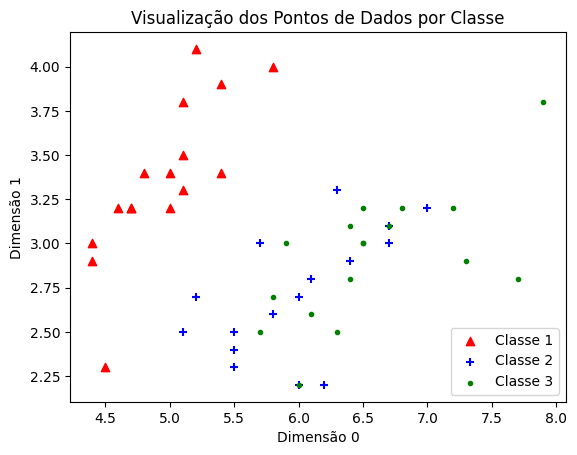

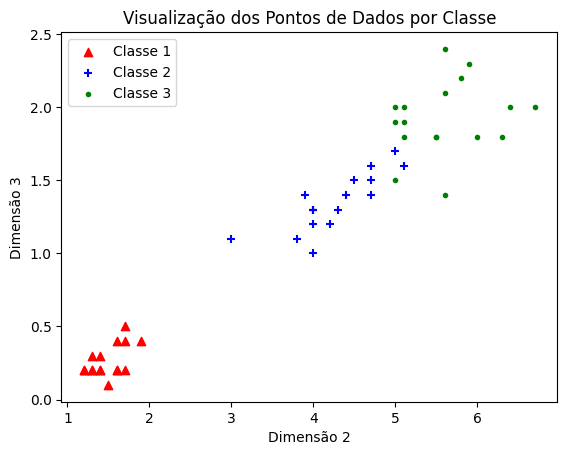

In [ ]:
#gráfico de dispersão com as duas primeiras colunas
visualizaPontos(grupoTest1, testRots1, d1=0, d2=1)  #características pouco discriminantes

visualizaPontos(grupoTest1, testRots1, d1=2, d2=3)  #características mais discriminantes

In [ ]:
#achando a acurácia máxima - k=1 96%; k=10 94%
#testando com k = 3
rotuloPrevisto = meuKnn(grupoTrain1, trainRots1, grupoTest1, k=3)

estaCorreto = rotuloPrevisto.flatten() == testRots1.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots1)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 98.00%


**Q1.1. Qual é a acurácia máxima que você consegue da classificação?**
A partir de tentativa e erro (aumentando e diminuindo o valor de k), conclui-se que a acurácia máxima é de 98% com k=3.

**Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?**
A partir da análise das combinações de features foi possível notar que para k=3 só conseguimos alcançar a acurácia máxima quando analisamos todas as features. No entanto, é importante ressaltar que as features 2 e 3 são discriminativas e alcançaram uma acurácia de 96%. Portanto, para esta classificação é importante ter todas as características.

In [ ]:
#testando diferentes combinações de features com k=3 (4 ao todo)
combinações = [(0,1), (2,3), (0,1,2), (0,1,2,3)]
for features in combinações:
    #selecionando as features para o conjunto de treino e teste
    x_train = grupoTrain1[:, features]
    x_test = grupoTest1[:, features]
    rotuloPrevisto = meuKnn(x_train, trainRots1, x_test, 3)
    acuracia = np.mean(rotuloPrevisto == testRots1.flatten())
    print(f"Features {features}: Acurácia = {acuracia:.2%}")

Features (0, 1): Acurácia = 72.00%
Features (2, 3): Acurácia = 96.00%
Features (0, 1, 2): Acurácia = 96.00%
Features (0, 1, 2, 3): Acurácia = 98.00%


## **demoD2**

In [ ]:
mat = scipy.loadmat('grupoDados2.mat')

grupoTest2 = mat['grupoTest']

#visualizando rapidamente
print(grupoTest2)

[[1.423000e+01 1.710000e+00 2.430000e+00 1.560000e+01 1.270000e+02
  2.800000e+00 3.060000e+00 2.800000e-01 2.290000e+00 5.640000e+00
  1.040000e+00 3.920000e+00 1.065000e+03]
 [1.437000e+01 1.950000e+00 2.500000e+00 1.680000e+01 1.130000e+02
  3.850000e+00 3.490000e+00 2.400000e-01 2.180000e+00 7.800000e+00
  8.600000e-01 3.450000e+00 1.480000e+03]
 [1.439000e+01 1.870000e+00 2.450000e+00 1.460000e+01 9.600000e+01
  2.500000e+00 2.520000e+00 3.000000e-01 1.980000e+00 5.250000e+00
  1.020000e+00 3.580000e+00 1.290000e+03]
 [1.386000e+01 1.350000e+00 2.270000e+00 1.600000e+01 9.800000e+01
  2.980000e+00 3.150000e+00 2.200000e-01 1.850000e+00 7.220000e+00
  1.010000e+00 3.550000e+00 1.045000e+03]
 [1.375000e+01 1.730000e+00 2.410000e+00 1.600000e+01 8.900000e+01
  2.600000e+00 2.760000e+00 2.900000e-01 1.810000e+00 5.600000e+00
  1.150000e+00 2.900000e+00 1.320000e+03]
 [1.363000e+01 1.810000e+00 2.700000e+00 1.720000e+01 1.120000e+02
  2.850000e+00 2.910000e+00 3.000000e-01 1.460000e+00

In [ ]:
mat = scipy.loadmat('grupoDados2.mat')

grupoTrain2 = mat['grupoTrain']

#visualizando rapidamente
print(grupoTrain2)

[[1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.324e+01 2.590e+00 2.870e+00 ... 1.040e+00 2.930e+00 7.350e+02]
 ...
 [1.371e+01 5.650e+00 2.450e+00 ... 6.400e-01 1.740e+00 7.400e+02]
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]]


In [ ]:
mat = scipy.loadmat('grupoDados2.mat')

trainRots2 = mat['trainRots']
testRots2 = mat['testRots']

#visualizando rapidamente
print(trainRots2)
print(testRots2)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [ ]:
#normalizando os dados de treino e teste
grupoTrain_normalizado = normalizacao(grupoTrain2)
grupoTest_normalizado = normalizacao(grupoTest2)

In [ ]:
matriz = dist(grupoTest_normalizado, grupoTrain_normalizado)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

['0.8537', '0.7052', '0.8997', '0.7406', '0.7367', '0.7072', '0.7037', '0.8728', '0.7689', '0.7290', '0.7491', '0.8297', '0.7211', '0.4417', '0.6497', '0.8804', '1.0423', '0.8523', '0.6959', '0.6755', '0.8411', '0.8041', '0.8325', '0.7228', '0.9938', '0.9710', '0.5757', '1.0523', '1.0239', '0.7542', '0.6893', '0.6446', '0.6863', '0.8329', '0.7105', '0.7991', '0.6916', '0.5516', '0.7617', '1.7600', '1.6168', '1.2414', '1.4545', '1.0853', '1.2769', '1.4601', '1.5153', '1.0620', '1.0561', '1.1567', '1.2770', '1.4733', '1.1917', '1.3248', '1.4315', '1.6175', '1.1088', '1.4490', '1.4516', '1.4263', '1.4991', '1.5793', '1.2924', '0.9994', '1.1928', '1.0724', '1.2109', '1.3466', '1.4672', '1.1585', '1.2715', '1.4438', '1.0875', '1.3480', '1.5248', '1.4800', '1.5743', '1.3558', '1.6418', '1.3642', '1.3895', '1.4473', '1.3163', '1.2925', '1.6059', '1.3334', '1.5387', '1.6213', '1.6578', '1.7106', '1.9484', '1.9497', '1.5822', '1.6013', '1.6512', '1.5917', '1.6170', '1.9683', '1.6254', '1.6821',

In [ ]:
meuKnn(grupoTrain_normalizado, trainRots2, grupoTest_normalizado, k=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
#testando k = 1
rotuloPrevisto = meuKnn(grupoTrain2, trainRots2, grupoTest2, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots2.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots2)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 68.33%


In [ ]:
#k = 3 e dados normalizados
rotuloPrevisto = meuKnn(grupoTrain_normalizado, trainRots2, grupoTest_normalizado, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots2.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots2)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 98.33%


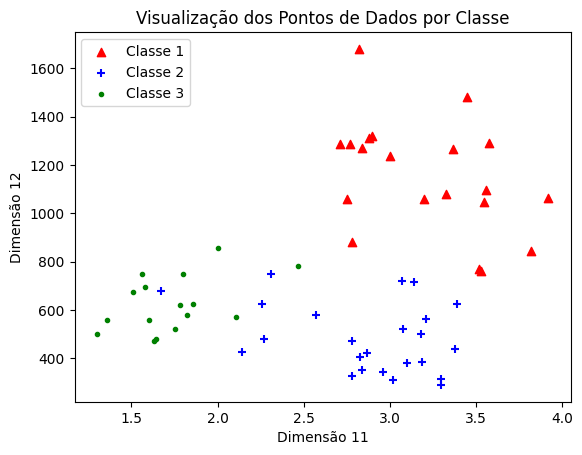

In [ ]:
#DÚVIDA
visualizaPontos(grupoTest2, testRots2, d1=11, d2=12)
#d11 e d12 / d5 e d6

In [ ]:
#Acurácia - dados não normalizados
for k in range(1, 30, 2):
    rotuloPrevisto = meuKnn(grupoTrain2, trainRots2, grupoTest2, k)
    acuracia = np.mean(rotuloPrevisto == testRots2.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

k = 1, Acurácia = 68.33%
k = 3, Acurácia = 61.67%
k = 5, Acurácia = 70.00%
k = 7, Acurácia = 73.33%
k = 9, Acurácia = 75.00%
k = 11, Acurácia = 75.00%
k = 13, Acurácia = 76.67%
k = 15, Acurácia = 75.00%
k = 17, Acurácia = 75.00%
k = 19, Acurácia = 75.00%
k = 21, Acurácia = 75.00%
k = 23, Acurácia = 73.33%
k = 25, Acurácia = 71.67%
k = 27, Acurácia = 73.33%
k = 29, Acurácia = 71.67%


In [ ]:
#Acurácia - dados normalizados
for k in range(1, 30, 2):
    rotuloPrevisto = meuKnn(grupoTrain_normalizado, trainRots2, grupoTest_normalizado, k)
    acuracia = np.mean(rotuloPrevisto == testRots2.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

k = 1, Acurácia = 98.33%
k = 3, Acurácia = 98.33%
k = 5, Acurácia = 98.33%
k = 7, Acurácia = 98.33%
k = 9, Acurácia = 100.00%
k = 11, Acurácia = 98.33%
k = 13, Acurácia = 98.33%
k = 15, Acurácia = 98.33%
k = 17, Acurácia = 98.33%
k = 19, Acurácia = 98.33%
k = 21, Acurácia = 98.33%
k = 23, Acurácia = 98.33%
k = 25, Acurácia = 98.33%
k = 27, Acurácia = 98.33%
k = 29, Acurácia = 98.33%


**Q2.1: Aplique seu kNN a este problema. Qual é a sua acurácia de classificação?** Inicialmente, a acurácia ficou em torno de 68% com k=1.

**Q2.2: A acurácia pode ser igual a 98% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 98% e explique o que você fez e por quê.** A acurácia estava inicialmente menor, pois estava sendo calculada com base nos dados não normalizados, após a normalização, a acurácia passou a ficar em torno de 98% com k=1. Também análisamos acurácia de diferentes k.

## **demoD3**

In [ ]:
mat = scipy.loadmat('grupoDados3.mat')

grupoTest3 = mat['grupoTest']

#visualizando rapidamente
print(grupoTest3)

[[4.7 0.2]
 [5.4 0.4]
 [4.4 0.2]
 [4.8 0.2]
 [5.8 0.2]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.5]
 [5.  0.4]
 [4.7 0.2]
 [5.2 0.1]
 [5.  0.2]
 [4.4 0.2]
 [4.5 0.3]
 [5.1 0.4]
 [4.6 0.2]
 [7.  1.4]
 [5.5 1.3]
 [6.3 1.6]
 [5.2 1.4]
 [6.  1. ]
 [6.7 1.4]
 [6.2 1.5]
 [6.1 1.3]
 [6.4 1.3]
 [6.7 1.7]
 [5.5 1.1]
 [6.  1.6]
 [6.7 1.5]
 [5.5 1.3]
 [5.8 1.2]
 [5.7 1.2]
 [5.1 1.1]
 [5.8 1.9]
 [6.5 2.2]
 [7.3 1.8]
 [6.5 2. ]
 [5.7 2. ]
 [6.5 1.8]
 [6.  1.5]
 [7.7 2. ]
 [7.2 1.8]
 [6.4 2.1]
 [7.9 2. ]
 [6.1 1.4]
 [6.4 1.8]
 [6.7 2.4]
 [6.8 2.3]
 [6.3 1.9]
 [5.9 1.8]]


In [ ]:
mat = scipy.loadmat('grupoDados3.mat')

grupoTrain3 = mat['grupoTrain']

#visualizando rapidamente
print(grupoTrain3)

[[5.1 0.2]
 [4.9 0.2]
 [4.6 0.2]
 [5.  0.2]
 [4.6 0.3]
 [5.  0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.7 0.4]
 [5.4 0.4]
 [5.7 0.3]
 [5.1 0.3]
 [5.1 0.4]
 [4.6 0.2]
 [4.8 0.2]
 [5.  0.2]
 [5.2 0.2]
 [5.2 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.5 0.2]
 [4.9 0.1]
 [5.5 0.2]
 [4.9 0.1]
 [5.1 0.2]
 [5.  0.3]
 [4.4 0.2]
 [5.  0.6]
 [4.8 0.3]
 [5.1 0.2]
 [5.3 0.2]
 [5.  0.2]
 [6.4 1.5]
 [6.9 1.5]
 [6.5 1.5]
 [5.7 1.3]
 [4.9 1. ]
 [6.6 1.3]
 [5.  1. ]
 [5.9 1.5]
 [6.1 1.4]
 [5.6 1.3]
 [5.6 1.5]
 [5.8 1. ]
 [5.6 1.1]
 [5.9 1.8]
 [6.3 1.5]
 [6.1 1.2]
 [6.6 1.4]
 [6.8 1.4]
 [6.  1.5]
 [5.7 1. ]
 [5.5 1. ]
 [5.8 1.2]
 [5.4 1.5]
 [6.  1.6]
 [6.3 1.3]
 [5.6 1.3]
 [5.5 1.2]
 [6.1 1.4]
 [5.  1. ]
 [5.6 1.3]
 [5.7 1.3]
 [6.2 1.3]
 [5.7 1.3]
 [6.3 2.5]
 [7.1 2.1]
 [6.3 1.8]
 [7.6 2.1]
 [4.9 1.7]
 [6.7 1.8]
 [7.2 2.5]
 [6.4 1.9]
 [6.8 2.1]
 [5.8 2.4]
 [6.4 2.3]
 [7.7 2.2]
 [7.7 2.3]
 [6.9 2.3]
 [5.6 2. ]
 [6.3 1.8]
 [6.7 2.1]
 [6.2 1.8]
 [6.1 1.8]
 [7.2 1.6]
 [7.4 1.9]
 [6.4 2.2]
 [6.3 1.5]
 [7.7 2.3]

In [ ]:
mat = scipy.loadmat('grupoDados3.mat')

trainRots3 = mat['trainRots']
testRots3 = mat['testRots']

#visualizando rapidamente
print(trainRots3)
print(testRots3)

[[1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [2]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [ ]:
matriz = dist(grupoTest3, grupoTrain3)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

['0.4000', '0.2000', '0.1000', '0.3000', '0.1414', '0.3000', '0.2236', '0.7000', '0.1414', '0.4123', '1.0198', '0.7280', '1.0050', '0.4123', '0.4472', '0.1000', '0.1000', '0.3000', '0.5000', '0.5000', '0.1000', '0.7280', '0.8000', '0.2236', '0.8000', '0.2236', '0.4000', '0.3162', '0.3000', '0.5000', '0.1414', '0.4000', '0.6000', '0.3000', '2.1401', '2.5554', '2.2204', '1.4866', '0.8246', '2.1954', '0.8544', '1.7692', '1.8439', '1.4213', '1.5811', '1.3601', '1.2728', '2.0000', '2.0616', '1.7205', '2.2472', '2.4187', '1.8385', '1.2806', '1.1314', '1.4866', '1.4765', '1.9105', '1.9416', '1.4213', '1.2806', '1.8439', '0.8544', '1.4213', '1.4866', '1.8601', '1.4866', '2.8018', '3.0610', '2.2627', '3.4670', '1.5133', '2.5612', '3.3971', '2.4042', '2.8320', '2.4597', '2.7019', '3.6056', '3.6620', '3.0414', '2.0125', '2.2627', '2.7586', '2.1932', '2.1260', '2.8653', '3.1906', '2.6249', '2.0616', '3.6620', '2.7203', '2.0616', '2.9069', '3.0414', '2.0248', '3.0480', '2.9000', '2.5456', '2.5807']

In [ ]:
meuKnn(grupoTrain3, trainRots3, grupoTest3, k=1)

array([2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3,
       2, 1, 3, 3, 3, 3])

In [ ]:
#k = 1
rotuloPrevisto = meuKnn(grupoTrain3, trainRots3, grupoTest3, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots3.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots3)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 62.00%


In [ ]:
#normalizando os dados de treino e teste
grupoTrain3_normalizado = normalizacao(grupoTrain3)
grupoTest3_normalizado = normalizacao(grupoTest3)

In [ ]:
#padronização
grupoTrain3_padronizado = padronizacao(grupoTrain3_normalizado)
grupoTest3_padronizado = padronizacao(grupoTest3_normalizado)

In [ ]:
matriz = dist(grupoTest3_padronizado, grupoTrain3_padronizado)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

['0.4855', '0.2569', '0.1980', '0.3683', '0.2980', '0.3683', '0.2211', '0.8473', '0.0979', '0.5182', '1.2669', '0.9217', '1.2341', '0.5341', '0.6061', '0.1980', '0.1635', '0.3683', '0.6050', '0.6050', '0.1635', '0.9217', '0.9692', '0.2211', '0.9692', '0.2211', '0.4855', '0.4304', '0.4161', '0.7271', '0.2762', '0.4855', '0.7258', '0.3683', '2.7339', '3.2253', '2.8283', '1.9502', '1.1710', '2.7765', '1.2003', '2.3031', '2.3753', '1.8765', '2.0896', '1.7581', '1.6750', '2.6107', '2.6418', '2.2049', '2.8488', '3.0524', '2.3827', '1.6669', '1.4982', '1.9344', '1.9731', '2.4797', '2.4767', '1.8765', '1.7015', '2.3753', '1.2003', '1.8765', '1.9502', '2.3811', '1.9502', '3.6267', '3.8861', '2.9139', '4.3696', '2.0534', '3.2637', '4.3242', '3.0910', '3.6154', '3.2205', '3.4862', '4.5441', '4.6203', '3.8836', '2.6548', '2.9139', '3.5292', '2.8331', '2.7554', '3.6050', '4.0213', '3.3845', '2.6418', '4.6203', '3.5199', '2.6812', '3.7038', '3.8836', '2.6536', '3.9133', '3.7175', '3.2681', '3.3458']

In [ ]:
meuKnn(grupoTrain3_padronizado, trainRots3, grupoTest3_padronizado, k=1)

array([2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 3,
       2, 1, 3, 3, 1, 1])

In [ ]:
#k = 9
rotuloPrevisto = meuKnn(grupoTrain3_padronizado, trainRots3, grupoTest3_padronizado, k=9)

estaCorreto = rotuloPrevisto.flatten() == testRots3.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots3)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 94.00%


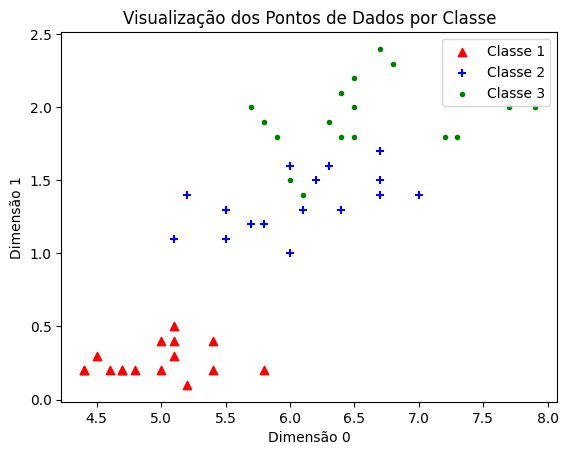

In [ ]:
visualizaPontos(grupoTest3, testRots3, d1=0, d2=1)

**Q3.1: Aplique o kNN ao problema usando k = 1. Qual é a acurácia na classificação?** Com k=1, a acurácia inicialmente é 62%.

**Q3.2: A acurácia pode ser igual a 92% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 92% e explique o que você fez e por quê.** Foi necessário fazer a normalizalção e padronização. Ademais, foi preciso mudar k para 9.

## **demoD4**

In [ ]:
mat = scipy.loadmat('grupoDados4.mat')

grupoTest4 = mat['testSet']

#visualizando rapidamente
print(grupoTest4)

[[3.06000000e+00 1.06500000e+03 8.70464096e-01 1.33758572e-01]
 [3.49000000e+00 1.48000000e+03 2.54435062e-01 1.34204660e-01]
 [2.52000000e+00 1.29000000e+03 5.08433818e-01 5.47628385e-01]
 [3.15000000e+00 1.04500000e+03 2.42962473e-01 4.14078281e-01]
 [2.76000000e+00 1.32000000e+03 4.99192389e-01 7.30490698e-01]
 [2.91000000e+00 1.31000000e+03 8.09482825e-01 8.34124037e-01]
 [3.93000000e+00 1.68000000e+03 4.93430534e-01 3.28165280e-01]
 [2.41000000e+00 7.70000000e+02 7.60256746e-01 6.57788191e-01]
 [2.61000000e+00 8.45000000e+02 7.88743040e-01 2.06774614e-01]
 [2.19000000e+00 1.28500000e+03 8.51929728e-01 7.28612183e-01]
 [3.25000000e+00 1.28500000e+03 6.24975689e-03 1.05123927e-01]
 [2.74000000e+00 1.23500000e+03 9.07454861e-01 1.39345609e-01]
 [2.68000000e+00 8.80000000e+02 8.88909630e-01 5.95871052e-01]
 [3.04000000e+00 7.60000000e+02 1.62206912e-01 9.49861270e-01]
 [3.56000000e+00 1.09500000e+03 4.21109134e-02 5.11057717e-01]
 [2.65000000e+00 1.08000000e+03 7.99774785e-01 7.663667

In [ ]:
mat = scipy.loadmat('grupoDados4.mat')

grupoTrain4 = mat['trainSet']

print(grupoTrain4)

[[2.76000000e+00 1.05000000e+03 5.47586289e-01 4.00873147e-01]
 [3.24000000e+00 1.18500000e+03 6.90522076e-01 7.03638645e-01]
 [2.69000000e+00 7.35000000e+02 6.71377653e-01 1.96019400e-01]
 [3.39000000e+00 1.45000000e+03 8.99318107e-01 2.89799233e-01]
 [2.51000000e+00 1.29500000e+03 9.89414250e-01 9.15992570e-01]
 [2.98000000e+00 1.04500000e+03 4.27602493e-01 8.40483923e-01]
 [3.32000000e+00 1.51000000e+03 8.46736750e-01 6.21149412e-01]
 [2.43000000e+00 1.28000000e+03 4.06791807e-01 3.39433910e-02]
 [3.69000000e+00 1.15000000e+03 6.68401282e-01 3.62968032e-01]
 [3.64000000e+00 1.54700000e+03 6.40816811e-01 4.44598827e-01]
 [3.14000000e+00 1.28000000e+03 6.21802098e-01 6.45707317e-02]
 [3.40000000e+00 1.13000000e+03 9.57774813e-01 7.71933664e-01]
 [3.03000000e+00 8.45000000e+02 9.84362296e-01 8.01177226e-01]
 [3.17000000e+00 7.80000000e+02 1.54481541e-01 6.98200910e-03]
 [2.88000000e+00 1.03500000e+03 9.84154157e-02 8.27337631e-01]
 [2.37000000e+00 1.01500000e+03 4.04669189e-01 5.107072

In [ ]:
mat = scipy.loadmat('grupoDados4.mat')

trainRots4 = mat['trainLabs']
testRots4 = mat['testLabs']

print(trainRots4)
print(testRots4)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]


In [ ]:
matriz = dist(grupoTest4, grupoTrain4)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

['15.0089', '120.0016', '330.0003', '385.0002', '230.0020', '20.0175', '445.0003', '215.0014', '85.0029', '482.0005', '215.0002', '65.0041', '220.0010', '285.0009', '30.0185', '50.0084', '235.0007', '130.0028', '150.0019', '30.0165', '450.0002', '75.0014', '30.0182', '145.0007', '40.0134', '45.0146', '270.0014', '30.0051', '385.0006', '180.0014', '0.8689', '80.0012', '195.0024', '85.0013', '125.0023', '310.0014', '55.0062', '95.0001', '220.0018', '545.0058', '615.0022', '435.0023', '710.0015', '387.0002', '555.0011', '315.0059', '195.0107', '655.0001', '80.0040', '179.0030', '673.0012', '565.0031', '602.0007', '787.0004', '435.0026', '550.0020', '615.0011', '570.0017', '385.0034', '440.0025', '615.0027', '570.0030', '720.0007', '128.0059', '637.0003', '405.0018', '355.0011', '503.0038', '650.0020', '393.0028', '555.0013', '577.0020', '385.0011', '503.0007', '458.0019', '631.0010', '658.0013', '570.0020', '693.0029', '501.0024', '600.0039', '700.0010', '685.0001', '687.0002', '599.0015'

In [ ]:
meuKnn(grupoTrain4, trainRots4, grupoTest4, k=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2])

In [ ]:
#k = 1
rotuloPrevisto = meuKnn(grupoTrain4, trainRots4, grupoTest4, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots4.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots4)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 71.67%


In [ ]:
#normalizando os dados de treino e teste
grupoTrain4_normalizado = normalizacao(grupoTrain4)
grupoTest4_normalizado = normalizacao(grupoTest4)

In [ ]:
#padronização
grupoTrain4_padronizado = padronizacao(grupoTrain4_normalizado)
grupoTest4_padronizado = padronizacao(grupoTest4_normalizado)

In [ ]:
matriz = dist(grupoTest4_padronizado, grupoTrain4_padronizado)

#imprimindo apenas 4 dígitos após a vírgula
for linha in matriz:
    print([f"{valor:.4f}" for valor in linha])

['1.4228', '2.1651', '1.2215', '1.5725', '3.0301', '2.8761', '2.3872', '1.8166', '1.2431', '2.2293', '1.1032', '2.3726', '2.5264', '2.5017', '3.5398', '2.1284', '1.5188', '2.8549', '2.4930', '2.3730', '2.1725', '0.9012', '3.0917', '1.4396', '3.0000', '3.6459', '2.9378', '1.5282', '2.1852', '2.5402', '2.9941', '0.9459', '2.9514', '1.4352', '1.4592', '3.2205', '2.7375', '0.3577', '2.4358', '3.2624', '2.5928', '2.6783', '3.5066', '1.2961', '2.2075', '3.3134', '2.1255', '2.2630', '2.5871', '1.9907', '3.5976', '3.4327', '3.2681', '2.6661', '2.1297', '2.3955', '2.3075', '2.4455', '3.4472', '2.2248', '2.6675', '3.9295', '3.3960', '3.3868', '2.4155', '3.5948', '1.4295', '4.0929', '3.5208', '3.6951', '2.9508', '3.5575', '3.3670', '2.8533', '3.2885', '2.6942', '3.9729', '2.5457', '4.0263', '2.8281', '3.6826', '3.5630', '2.5341', '2.4884', '4.0726', '2.9284', '3.3505', '3.7690', '2.3663', '3.2871', '2.8341', '3.7728', '3.5396', '3.7143', '3.1576', '3.6965', '4.5074', '3.4259', '3.4825', '3.2985',

In [ ]:
meuKnn(grupoTrain4_padronizado, trainRots4, grupoTest4_padronizado, k=1)

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3])

In [ ]:
#k = 1 e dados normalizados
rotuloPrevisto = meuKnn(grupoTrain4_normalizado, trainRots4, grupoTest4_normalizado, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots4.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots4)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 80.00%


In [ ]:
#k = 1 e dados padronizado
rotuloPrevisto = meuKnn(grupoTrain4_padronizado, trainRots4, grupoTest4_padronizado, k=1)

estaCorreto = rotuloPrevisto.flatten() == testRots4.flatten()
numCorreto = np.sum(estaCorreto)
totalNum = len(testRots4)
acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia * 100:.2f}%")

Acurácia: 80.00%


In [ ]:
#tentando achar o erro - testando vários valores para k (ímpares)
for k in range(1, 16, 2):
    rotuloPrevisto = meuKnn(grupoTrain4_normalizado, trainRots4, grupoTest4_normalizado, k)
    acuracia = np.mean(rotuloPrevisto == testRots4.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

k = 1, Acurácia = 80.00%
k = 3, Acurácia = 85.00%
k = 5, Acurácia = 83.33%
k = 7, Acurácia = 80.00%
k = 9, Acurácia = 81.67%
k = 11, Acurácia = 85.00%
k = 13, Acurácia = 81.67%
k = 15, Acurácia = 85.00%


In [ ]:
#tentando achar o erro - testando vários valores para k (ímpares) - padronizado
for k in range(1, 16, 2):
    rotuloPrevisto = meuKnn(grupoTrain4_padronizado, trainRots4, grupoTest4_padronizado, k)
    acuracia = np.mean(rotuloPrevisto == testRots4.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

k = 1, Acurácia = 80.00%
k = 3, Acurácia = 86.67%
k = 5, Acurácia = 83.33%
k = 7, Acurácia = 90.00%
k = 9, Acurácia = 90.00%
k = 11, Acurácia = 85.00%
k = 13, Acurácia = 83.33%
k = 15, Acurácia = 86.67%


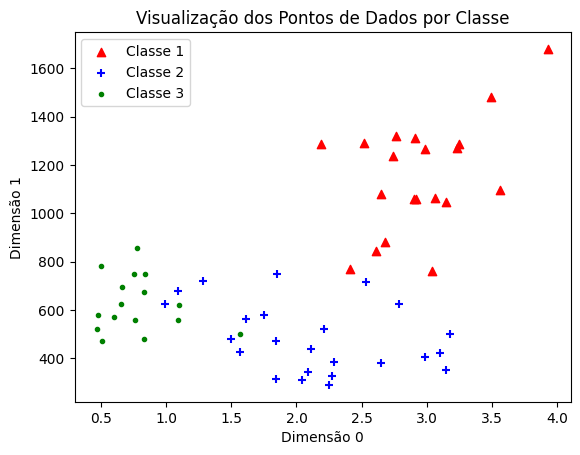

In [ ]:
#tentando achar o erro
visualizaPontos(grupoTest4, testRots4, d1=0, d2=1)
#d2 e d3 não são características com alta correlação e tão discriminativas

In [ ]:
#a partir do gráfico, calcular apenas para as features 0 e 1 (mais relevantes) - normzalizado
for k in range(1, 16, 2):
    x_train = grupoTrain4_normalizado[:, [0, 1]] #seleciona as colunas 0 e 1 de cada amostra
    x_test = grupoTest4_normalizado[:, [0, 1]]
    rotuloPrevisto = meuKnn(x_train, trainRots4, x_test, k)
    acuracia = np.mean(rotuloPrevisto == testRots4.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

#nem todas as características são boas e podem acabar atrapalhando

k = 1, Acurácia = 90.00%
k = 3, Acurácia = 91.67%
k = 5, Acurácia = 93.33%
k = 7, Acurácia = 93.33%
k = 9, Acurácia = 93.33%
k = 11, Acurácia = 93.33%
k = 13, Acurácia = 93.33%
k = 15, Acurácia = 93.33%


In [ ]:
#padronizado
for k in range(1, 16, 2):
    x_train = grupoTrain4_padronizado[:, [0, 1]] #seleciona as colunas 0 e 1 de cada amostra
    x_test = grupoTest4_padronizado[:, [0, 1]]
    rotuloPrevisto = meuKnn(x_train, trainRots4, x_test, k)
    acuracia = np.mean(rotuloPrevisto == testRots4.flatten())
    print(f"k = {k}, Acurácia = {acuracia * 100:.2f}%")

#nem todas as características são boas e podem acabar atrapalhando

k = 1, Acurácia = 93.33%
k = 3, Acurácia = 91.67%
k = 5, Acurácia = 91.67%
k = 7, Acurácia = 90.00%
k = 9, Acurácia = 91.67%
k = 11, Acurácia = 90.00%
k = 13, Acurácia = 91.67%
k = 15, Acurácia = 91.67%


**Q4.1: Aplique seu algoritmo K-NN ao problema. Qual é a sua acurácia de classificação?** A acurácia inicialmente, sem normalização e considerando que todas as fetures são igualmente relevantes, foi de aproximadamente 72%, para k=1.

**Q4.2: A acurácia pode chegar a 92% com o K-NN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou o valor de k de forma que a acurácia atinja 92% e explique o que você fez e por quê. Observe que, desta vez, há mais de um problema...** Primeiramente, foi adotada a normalização e padronização, chegando em 80% (com k=1), a partir da visualização e manipulação do gráfico de dispersão, foi possível notar que as features 0 e 1 são as mais "importantes", possuem uma relação mais forte, por isso, foram filtradas apenas essas duas features e calulado novamente a acurácia, que dessa vez atingiu, como valor máximo, 93,33% com k=5 (normalizado) e 93,33% com k=1 (padronizado).